In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import networkx as nx
import time
from datetime import timedelta
import community
from copy import deepcopy
from community import community_louvain
import matplotlib.cm as cm

In [38]:
df=pd.read_csv(r'out.ucidata-zachary')
df.drop([0],inplace=True)
df

,% sym weighted
1,1 2 4
2,1 3 5
3,1 4 3
4,1 5 3
5,1 6 3
...,...
74,31 33 3
75,31 34 3
76,32 33 4
77,32 34 4


In [3]:
df['% sym weighted']=df['% sym weighted'].str.split(' ')
df

,% sym weighted
1,"[1, 2, 4]"
2,"[1, 3, 5]"
3,"[1, 4, 3]"
4,"[1, 5, 3]"
5,"[1, 6, 3]"
...,...
74,"[31, 33, 3]"
75,"[31, 34, 3]"
76,"[32, 33, 4]"
77,"[32, 34, 4]"


In [4]:
## Rescale weigths in [0,1] by dividing with maximum value
m=max(int(l[2]) for l in df['% sym weighted'])
for j in range(1,len(df['% sym weighted'])+1):
    df['% sym weighted'][j][2]=int(df['% sym weighted'][j][2])/m
    df['% sym weighted'][j][2]=round(df['% sym weighted'][j][2],5)
    df['% sym weighted'][j][2]=str(df['% sym weighted'][j][2])
    df['% sym weighted'][j]=' '.join(df['% sym weighted'][j])
df

,% sym weighted
1,1 2 0.57143
2,1 3 0.71429
3,1 4 0.42857
4,1 5 0.42857
5,1 6 0.42857
...,...
74,31 33 0.42857
75,31 34 0.42857
76,32 33 0.57143
77,32 34 0.57143


In [5]:
## save csv locally
df.to_csv(r'out.ucidata-zachary(rescaled_weights).txt', header=None, index=None, quoting=csv.QUOTE_NONE, escapechar=' ')

In [6]:
## create graph with the rescaled weights with Networkx
Data=open(r'out.ucidata-zachary(rescaled_weights).txt', "r")
Graphtype=nx.Graph()
G=nx.read_weighted_edgelist(Data,create_using=Graphtype)

In [7]:
## create file for Gephi
nx.write_gexf(G, r'out.ucidata-zachary.gexf')

In [8]:
## Execute Louvain method to get the communities
part=community_louvain.best_partition(G,weight='weight')
modularity = community.modularity(part, G, weight='weight')
print("The modularity Q based on networkx is {}".format(modularity))

The modularity Q based on networkx is 0.4449036119160915


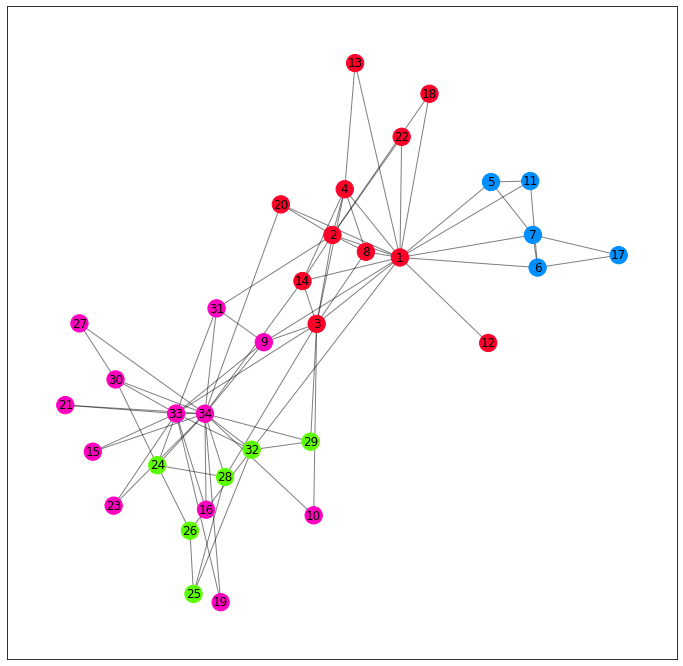

In [9]:
## plot community structure
pos = nx.spring_layout(G)
cmap = cm.get_cmap('gist_rainbow', max(part.values()) + 1)
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=300,
                       cmap=cmap, node_color=list(part.values()))
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.draw()

In [10]:
## Saves dictionarys to json
def save_dict(diction):
    json_d=json.dumps(diction)
    f=open('Dictionary.json',"w")
    f.write(json_d)
    f.close()

In [11]:
## Dictionary with each node's incident edges
def conn_edges(lst):
    Dict = {}
    for i in range(1,35):
        Dict[str(i)] = []
        for l in lst:   
            if int(l[0])==i:
                    Dict[str(i)].append(l[1])
    return Dict

In [12]:
## Fill missing values
def misval(dct):
    for i in range(1,len(dct)+1):
        for j in range(2,len(dct)+1):
            if str(j) in dct[str(i)]:
                dct[str(j)].append(i)
    for key, value in dct.items(): #Convert values to integers
        dct[key] = [int(item) for item in value]
    return dct

In [13]:
df['% sym weighted']=df['% sym weighted'].str.split(' ')
df

,% sym weighted
1,"[1, 2, 0.57143]"
2,"[1, 3, 0.71429]"
3,"[1, 4, 0.42857]"
4,"[1, 5, 0.42857]"
5,"[1, 6, 0.42857]"
...,...
74,"[31, 33, 0.42857]"
75,"[31, 34, 0.42857]"
76,"[32, 33, 0.57143]"
77,"[32, 34, 0.57143]"


In [14]:
## neighbors of each node
All_edges=conn_edges(df['% sym weighted'])
All_edges=misval(All_edges)
All_edges

{'1': [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32],
 '2': [3, 4, 8, 14, 18, 20, 22, 31, 1],
 '3': [4, 8, 9, 10, 14, 28, 29, 33, 1, 2],
 '4': [8, 13, 14, 1, 2, 3],
 '5': [7, 11, 1],
 '6': [7, 11, 17, 1],
 '7': [17, 1, 5, 6],
 '8': [1, 2, 3, 4],
 '9': [31, 33, 34, 1, 3],
 '10': [34, 3],
 '11': [1, 5, 6],
 '12': [1],
 '13': [1, 4],
 '14': [34, 1, 2, 3, 4],
 '15': [33, 34],
 '16': [33, 34],
 '17': [6, 7],
 '18': [1, 2],
 '19': [33, 34],
 '20': [34, 1, 2],
 '21': [33, 34],
 '22': [1, 2],
 '23': [33, 34],
 '24': [26, 28, 30, 33, 34],
 '25': [26, 28, 32],
 '26': [32, 24, 25],
 '27': [30, 34],
 '28': [34, 3, 24, 25],
 '29': [32, 34, 3],
 '30': [33, 34, 24, 27],
 '31': [33, 34, 2, 9],
 '32': [33, 34, 1, 25, 26, 29],
 '33': [34, 3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32],
 '34': [9, 10, 14, 15, 16, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33]}

In [15]:
save_dict(All_edges) ## save dictionary of neighbors

In [16]:
save_dict(part) ## save dictionary of community partition

In [17]:
## find the Endogenous Ee and Exogenous Ex sets
def endog(lst):
    Dict_1 = {}
    Dict_2 = {}
    for i in range(1,35):
        Dict_1[str(i)] = []
        Dict_2[str(i)] = []
        for l in lst:   
            if int(l[0])==i:
                if part[(l[1])]==part[l[0]]:
                    Dict_1[str(i)].append(l[1])
            else:
                Dict_2[str(i)].append(l[1])
    return Dict_1,Dict_2

In [18]:
E_e,E_x=endog(df['% sym weighted'])
E_e=misval(E_e)
E_e

{'1': [2, 3, 4, 8, 12, 13, 14, 18, 20, 22],
 '2': [3, 4, 8, 14, 18, 20, 22, 1],
 '3': [4, 8, 14, 1, 2],
 '4': [8, 13, 14, 1, 2, 3],
 '5': [7, 11],
 '6': [7, 11, 17],
 '7': [17, 5, 6],
 '8': [1, 2, 3, 4],
 '9': [31, 33, 34],
 '10': [34],
 '11': [5, 6],
 '12': [1],
 '13': [1, 4],
 '14': [1, 2, 3, 4],
 '15': [33, 34],
 '16': [33, 34],
 '17': [6, 7],
 '18': [1, 2],
 '19': [33, 34],
 '20': [1, 2],
 '21': [33, 34],
 '22': [1, 2],
 '23': [33, 34],
 '24': [26, 28],
 '25': [26, 28, 32],
 '26': [32, 24, 25],
 '27': [30, 34],
 '28': [24, 25],
 '29': [32],
 '30': [33, 34, 27],
 '31': [33, 34, 9],
 '32': [25, 26, 29],
 '33': [34, 9, 15, 16, 19, 21, 23, 30, 31],
 '34': [9, 10, 15, 16, 19, 21, 23, 27, 30, 31, 33]}

In [19]:
save_dict(E_e) ## save dictionary of Enogenous set

In [20]:
## create dictionary for each node, with the weights of each endogenous edge
def dictweights(dct,lst):
    w={}
    for i in range(1,35):
        w[str(i)] = {}
        for j in range(1,len(lst)+1):
            for values in dct[str(i)]:
                if i<values:
                    if int(lst[j][0])==i:
                        if values==int(lst[j][1]):
                            w[str(i)].update({values:float(lst[j][2])})
                else:
                    if int(lst[j][0])==values:
                        if i==int(lst[j][1]):
                            w[str(i)].update({values:float(lst[j][2])})
    return w

In [21]:
weights=dictweights(E_e,df['% sym weighted'])
weights

{'1': {2: 0.57143,
  3: 0.71429,
  4: 0.42857,
  8: 0.28571,
  12: 0.42857,
  13: 0.14286,
  14: 0.42857,
  18: 0.28571,
  20: 0.28571,
  22: 0.28571},
 '2': {1: 0.57143,
  3: 0.85714,
  4: 0.42857,
  8: 0.57143,
  14: 0.71429,
  18: 0.14286,
  20: 0.28571,
  22: 0.28571},
 '3': {1: 0.71429, 2: 0.85714, 4: 0.42857, 8: 0.57143, 14: 0.42857},
 '4': {1: 0.42857,
  2: 0.42857,
  3: 0.42857,
  8: 0.42857,
  13: 0.42857,
  14: 0.42857},
 '5': {7: 0.28571, 11: 0.42857},
 '6': {7: 0.71429, 11: 0.42857, 17: 0.42857},
 '7': {5: 0.28571, 6: 0.71429, 17: 0.42857},
 '8': {1: 0.28571, 2: 0.57143, 3: 0.57143, 4: 0.42857},
 '9': {31: 0.42857, 33: 0.42857, 34: 0.57143},
 '10': {34: 0.28571},
 '11': {5: 0.42857, 6: 0.42857},
 '12': {1: 0.42857},
 '13': {1: 0.14286, 4: 0.42857},
 '14': {1: 0.42857, 2: 0.71429, 3: 0.42857, 4: 0.42857},
 '15': {33: 0.42857, 34: 0.28571},
 '16': {33: 0.42857, 34: 0.57143},
 '17': {6: 0.42857, 7: 0.42857},
 '18': {1: 0.28571, 2: 0.14286},
 '19': {33: 0.14286, 34: 0.28571},
 

In [22]:
## sort the dictionary of weights and the nodes in Ee, in decreasing order
def sortweights(dct_w,dct_E):
    sorted_dct_w={}
    for i in range (1,len(dct_w)+1):
        sorted_dct_w[i]=sorted(dct_w[str(i)].items(), key=lambda x:x[1], reverse=True)
        dct_w[str(i)]=dict(sorted_dct_w[i])
        dct_E[str(i)]=list(dct_w[str(i)].keys())
    return dct_w,dct_E

In [23]:
save_dict(weights) ## save dictionary of weights

In [24]:
weights=sortweights(weights,E_e)
weights

({'1': {3: 0.71429,
   2: 0.57143,
   4: 0.42857,
   12: 0.42857,
   14: 0.42857,
   8: 0.28571,
   18: 0.28571,
   20: 0.28571,
   22: 0.28571,
   13: 0.14286},
  '2': {3: 0.85714,
   14: 0.71429,
   1: 0.57143,
   8: 0.57143,
   4: 0.42857,
   20: 0.28571,
   22: 0.28571,
   18: 0.14286},
  '3': {2: 0.85714, 1: 0.71429, 8: 0.57143, 4: 0.42857, 14: 0.42857},
  '4': {1: 0.42857,
   2: 0.42857,
   3: 0.42857,
   8: 0.42857,
   13: 0.42857,
   14: 0.42857},
  '5': {11: 0.42857, 7: 0.28571},
  '6': {7: 0.71429, 11: 0.42857, 17: 0.42857},
  '7': {6: 0.71429, 17: 0.42857, 5: 0.28571},
  '8': {2: 0.57143, 3: 0.57143, 4: 0.42857, 1: 0.28571},
  '9': {34: 0.57143, 31: 0.42857, 33: 0.42857},
  '10': {34: 0.28571},
  '11': {5: 0.42857, 6: 0.42857},
  '12': {1: 0.42857},
  '13': {4: 0.42857, 1: 0.14286},
  '14': {2: 0.71429, 1: 0.42857, 3: 0.42857, 4: 0.42857},
  '15': {33: 0.42857, 34: 0.28571},
  '16': {34: 0.57143, 33: 0.42857},
  '17': {6: 0.42857, 7: 0.42857},
  '18': {1: 0.28571, 2: 0.14286

In [25]:
E_e

{'1': [3, 2, 4, 12, 14, 8, 18, 20, 22, 13],
 '2': [3, 14, 1, 8, 4, 20, 22, 18],
 '3': [2, 1, 8, 4, 14],
 '4': [1, 2, 3, 8, 13, 14],
 '5': [11, 7],
 '6': [7, 11, 17],
 '7': [6, 17, 5],
 '8': [2, 3, 4, 1],
 '9': [34, 31, 33],
 '10': [34],
 '11': [5, 6],
 '12': [1],
 '13': [4, 1],
 '14': [2, 1, 3, 4],
 '15': [33, 34],
 '16': [34, 33],
 '17': [6, 7],
 '18': [1, 2],
 '19': [34, 33],
 '20': [1, 2],
 '21': [33, 34],
 '22': [1, 2],
 '23': [34, 33],
 '24': [26, 28],
 '25': [28, 26, 32],
 '26': [32, 24, 25],
 '27': [30, 34],
 '28': [24, 25],
 '29': [32],
 '30': [27, 33, 34],
 '31': [9, 33, 34],
 '32': [26, 25, 29],
 '33': [34, 30, 9, 15, 16, 21, 31, 23, 19],
 '34': [33, 9, 16, 23, 31, 10, 15, 19, 27, 30, 21]}

In [26]:
save_dict(E_e) ## save the sorted Ee set

In [27]:
def binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e):
    d_m=(d_l+d_r)/2
    Graphhh[str(node)][str(cause)]['weight']=d_m # Intervention
    new_part=deepcopy(parttt) # keep the communities of all nodes fixed (we put v in singleton community in def calc_com)
    new_part[str(node)]=calc_comm(node,parttt,new_part,All_edges,intervent_set) ## recalculation of communities with our approach
    while new_part[str(node)]!=parttt[str(node)]:
        if d_r-d_l<=e:
            d_m=round(d_m,6)            
            owr=round(weights[0][str(node)][cause]-d_m,6)
            return owr,d_m
        else:
            d_l=d_m
            return binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e)
    else:
        d_r=d_m
        return binary_search(Graphhh,node,cause,d_l,d_r,parttt,intervent_set,e)

In [28]:
def calc_comm(node,partit,n_partit,A_edges,interv_set): ## our approach to recalculate communities after the intervention
    max_modul=0
    n_A_edges=deepcopy(A_edges[str(node)]) ## create a new set of neighbors
    for i in interv_set: ## remove the deleted edges from the copy 
        n_A_edges.remove(int(i[1]))
    n_partit[str(node)]=len(set(val for dic in partit for val in partit.values()))+1 ## put v in a singleton community
    singleton_com=n_partit[str(node)] # the singleton community we put v
    if len(n_A_edges)==0: # the case were v after the intervention has no neighbors, unary community 
        best_part=partit[str(node)]
        return best_part
    else:
        lst=[]
        for i in n_A_edges:
            if i not in lst:
                n_partit[str(node)]=partit[str(i)] # put v in partition of neighbor
                modularity=community.modularity(n_partit, G, weight='weight') # calculate modularity
                if modularity>max_modul: # if modularity is greater than the previous one
                    max_modul=modularity # save modularity
                    best_part=partit[str(i)] # place v in the community where the modularity is maximized
                n_partit[str(node)]=singleton_com # place v back to the singleton community for the next iteration
                lst.append(i)
    return best_part

In [29]:
def find_causes(Graf,dict_part,dict_endog): ## discover counterfactual causes for every node in network
    Dict_counter={} #Dictionary for counterfactuals
    Dict_Gamma={} #Dictionary for contingencies
    list_causes=[{} for n in range(len(dict_endog)+1)]
    for j in range(1,len(dict_endog)+1):
        Dict_counter[str(j)]=[]
        Dict_Gamma[str(j)]=[]
        for i in range(0,len(dict_endog[str(j)])):
            ebunch=[(str(j),str(dict_endog[str(j)][i]))] ## node to remove
            Graf.remove_edges_from(ebunch) #Intervention
            new_partition=deepcopy(dict_part) # keep the communities of all nodes fixed (we put v in singleton in def calc_com)
            new_partition[str(j)]=calc_comm(j,dict_part,new_partition,All_edges,ebunch) ## recalculation of communities
            if new_partition[str(j)]!=dict_part[str(j)]:
                Graf.add_edge(str(j),str(dict_endog[str(j)][i]),weight=weights[0][str(j)][dict_endog[str(j)][i]])
                optimal_red,n_weight=binary_search(Graf,j,dict_endog[str(j)][i],0,weights[0][str(j)][dict_endog[str(j)][i]],dict_part,ebunch,0.001)
                counterf_cause=dict_endog[str(j)][i] ## 
                resp=1/(1 + optimal_red) ## calculation of responsibility
                Dict_counter[str(j)].append(counterf_cause) # add counterfactual cause to dictionary
                list_causes[j]={'Node':j,'Counterfactual cause':dict_endog[str(j)][i],'Binary':dict_endog[str(j)][i],'Old partition':dict_part[str(j)],'New partition':new_partition[str(j)],'Old Weight':weights[0][str(j)][dict_endog[str(j)][i]],'New weight':n_weight,'Weight Reduction':optimal_red,'Responsibility score':resp}
                print('For node',j,'a counterfactual cause has been found:',counterf_cause, '. The old weight is=',weights[0][str(j)][counterf_cause],'and the new weight=',n_weight,'.The optimar reduction is=',optimal_red,'and the resposnibility score is ρ =',resp)
            else:
                Dict_Gamma[str(j)].append(dict_endog[str(j)][i]) ## contingencies
            ## Undo the intervention    
            new_partition=dict_part
            Graf.add_edge(str(j),str(dict_endog[str(j)][i]),weight=weights[0][str(j)][dict_endog[str(j)][i]])
    return Dict_counter,Dict_Gamma,list_causes

In [30]:
start_time = time.time()
OurApproach_Counterf_causes,OurApproach_Cont_sets,count_causes=find_causes(G,part,E_e)
elapsed=time.time() - start_time
elapsed=str(timedelta(seconds=elapsed))
print("Execution time:",elapsed)

For node 9 a counterfactual cause has been found: 34 . The old weight is= 0.57143 and the new weight= 0.01144 .The optimar reduction is= 0.55999 and the resposnibility score is ρ = 0.6410297501907064
For node 10 a counterfactual cause has been found: 34 . The old weight is= 0.28571 and the new weight= 0.285431 .The optimar reduction is= 0.000279 and the resposnibility score is ρ = 0.9997210778192885
For node 24 a counterfactual cause has been found: 26 . The old weight is= 0.71429 and the new weight= 0.528393 .The optimar reduction is= 0.185897 and the resposnibility score is ρ = 0.843243553192225
For node 24 a counterfactual cause has been found: 28 . The old weight is= 0.57143 and the new weight= 0.385325 .The optimar reduction is= 0.186105 and the resposnibility score is ρ = 0.8430956787130988
For node 29 a counterfactual cause has been found: 32 . The old weight is= 0.28571 and the new weight= 0.285431 .The optimar reduction is= 0.000279 and the resposnibility score is ρ = 0.999721

In [31]:
count_causes = [item for item in count_causes if item]
count_causes

[{'Node': 9,
  'Counterfactual cause': 34,
  'Binary': 34,
  'Old partition': 3,
  'New partition': 0,
  'Old Weight': 0.57143,
  'New weight': 0.01144,
  'Weight Reduction': 0.55999,
  'Responsibility score': 0.6410297501907064},
 {'Node': 10,
  'Counterfactual cause': 34,
  'Binary': 34,
  'Old partition': 3,
  'New partition': 0,
  'Old Weight': 0.28571,
  'New weight': 0.285431,
  'Weight Reduction': 0.000279,
  'Responsibility score': 0.9997210778192885},
 {'Node': 24,
  'Counterfactual cause': 28,
  'Binary': 28,
  'Old partition': 1,
  'New partition': 3,
  'Old Weight': 0.57143,
  'New weight': 0.385325,
  'Weight Reduction': 0.186105,
  'Responsibility score': 0.8430956787130988},
 {'Node': 29,
  'Counterfactual cause': 32,
  'Binary': 32,
  'Old partition': 1,
  'New partition': 3,
  'Old Weight': 0.28571,
  'New weight': 0.285431,
  'Weight Reduction': 0.000279,
  'Responsibility score': 0.9997210778192885},
 {'Node': 32,
  'Counterfactual cause': 26,
  'Binary': 26,
  'Old 

In [32]:
for i in range(1,len(OurApproach_Counterf_causes)+1):
    if len(OurApproach_Counterf_causes[str(i)])==0:
        del OurApproach_Counterf_causes[str(i)]
    if len(OurApproach_Cont_sets[str(i)])==0:
        del OurApproach_Cont_sets[str(i)]

In [33]:
OurApproach_Counterf_causes

{'9': [34], '10': [34], '24': [26, 28], '29': [32], '32': [26]}

In [34]:
## delete first edge e (fixed node)
for i in OurApproach_Cont_sets:
    del OurApproach_Cont_sets[str(i)][0]
OurApproach_Cont_sets

{'1': [2, 4, 12, 14, 8, 18, 20, 22, 13],
 '2': [14, 1, 8, 4, 20, 22, 18],
 '3': [1, 8, 4, 14],
 '4': [2, 3, 8, 13, 14],
 '5': [7],
 '6': [11, 17],
 '7': [17, 5],
 '8': [3, 4, 1],
 '9': [33],
 '11': [6],
 '12': [],
 '13': [1],
 '14': [1, 3, 4],
 '15': [34],
 '16': [33],
 '17': [7],
 '18': [2],
 '19': [33],
 '20': [2],
 '21': [34],
 '22': [2],
 '23': [33],
 '25': [26, 32],
 '26': [24, 25],
 '27': [34],
 '28': [25],
 '30': [33, 34],
 '31': [33, 34],
 '32': [29],
 '33': [30, 9, 15, 16, 21, 31, 23, 19],
 '34': [9, 16, 23, 31, 10, 15, 19, 27, 30, 21]}

In [35]:
## Saves dictionarys to json
def save_dict(diction):
    json_d=json.dumps(diction)
    f=open('Dictionary.json',"w")
    f.write(json_d)
    f.close()

In [36]:
save_dict(OurApproach_Cont_sets)

In [37]:
save_dict(OurApproach_Counterf_causes)